In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [18]:
def style(cell):
    """style(n)
    Funkcja sprawdzająca zgodność komórki `In[n]` notatnika
    ze standardem stylu PEP-8."""
    try:
        import pycodestyle as pep8
    except ImportError:
        import pep8
    code = (In[cell]+'\n').splitlines(True)
    return pep8.Checker('In[{0}]'.format(cell), code).check_all()


def pochodna_num(x):
    '''
    Funkcja obliczającą pochodną wyznaczoną metodą
    numeryczną z przybliżeniem do 2ch miejsc po przecinku.
    '''
    h = 1e-5
    return int(((f(x+h)-f(x))/(h))*100)/100


def newton_raphson(f, a, b, precyzja=10**(-6), wykres=True):
    '''
    Funkcja obliczająca przybliżenie miejsca zerowego na
    zadanym przedziale dla podanej funkcji i zadanej precyzji.
    W przypadku wprowadzenia wykres=False funkcja zwróci jedynie
    przybliżnie x0 natomiast dla wykres=True funkcja przygotuje
    wykres zawierający styczne przechodzące przez kolejne (max 3)
    sprawdzane punkty. Jeżeli funkcja znajdzie przybliżenie x0
    wcześniej -> ilość stycznych będzie odpowiednio mniejsza.
    '''
    if f(a)*f(b) > 0:
        return 'Błąd. Warunki nie są spełnione.'
    else:
        x0 = a
        x1 = x0 - f(x0)/pochodna_num(x0)
        X1, Y1 = [], []
        X1.append(x0)
        X1.append(x1)
        Y1.append(f(x0))
        Y1.append(f(x1))
        n = 1
        while abs(x1-x0) > precyzja:
            x0 = x1
            x1 = x0-f(x0)/pochodna_num(x0)
            n += 1
            if n <= 3:
                X1.append(x1)
                Y1.append(f(x1))
    if wykres:
        #Wykres funkcji + miejsce zerowe
        X = np.linspace(a, b, 1000)
        Y = [f(x) for x in X]
        plt.plot(X, Y, color='black', label='f(x)')
        plt.xlim(a, b)
        plt.axhline(0, a, b, color='grey', linestyle='--')
        plt.annotate('$x_{n}$', xy=(x1, 0), xytext=(x1+0.05, -0.1),
                     color='black', weight='bold')
        plt.plot(x1, 0, 'o', color='black')
        if len(X1) == 1:
            #Gdy mamy od razu miejsce zerowe w granicach przybliżenia
            plt.show()
        if len(X1) == 2:
            #Gdy mamy 1 styczną
            plt.plot([X1[0], X1[1]], [Y1[0], 0], color='orange', label='k=1')
            plt.vlines(X1[1], Y1[1], 0, color='orange', linestyles='dashdot')
            plt.plot(X1[1], Y1[1], 'o', color='orange')
            plt.plot(X1[1], 0, 'o', color='orange')
            plt.annotate('$x_{1}$', xy=(X1[1], 0), xytext=(X1[1]+0.25, 0.1),
                         color='orange', weight='bold')
        elif len(X1) == 3:
            #Gdy mamy 2 styczne
            plt.plot([X1[0], X1[1]], [Y1[0], 0], color='orange', label='k=1')
            plt.vlines(X1[1], Y1[1], 0, color='orange', linestyles='dashdot')
            plt.plot(X1[1], Y1[1], 'o', color='orange')
            plt.plot(X1[1], 0, 'o', color='orange')
            plt.annotate('$x_{1}$', xy=(X1[1], 0), xytext=(X1[1]+0.25, 0.1),
                         color='orange', weight='bold')
            plt.plot([X1[1], X1[2]], [Y1[1], 0], color='red', label='k=2')
            plt.vlines(X1[2], Y1[2], 0, color='red', linestyles='dashdot')
            plt.plot(X1[2], Y1[2], 'o', color='red')
            plt.plot(X1[2], 0, 'o', color='red')
            plt.annotate('$x_{2}$', xy=(X1[2], 0), xytext=(X1[2]+0.25, 0.1),
                         color='red', weight='bold')
        else:
            #Gdy mamy 3 lub więcej. Ale rysujemy tylko pierwsze 3.
            plt.plot([X1[0], X1[1]], [Y1[0], 0], color='orange', label='k=1')
            plt.vlines(X1[1], Y1[1], 0, color='orange', linestyles='dashdot')
            plt.plot(X1[1], Y1[1], 'o', color='orange')
            plt.plot(X1[1], 0, 'o', color='orange')
            plt.annotate('$x_{1}$', xy=(X1[1], 0), xytext=(X1[1]+0.25, 0.1),
                         color='orange', weight='bold')
            plt.plot([X1[1], X1[2]], [Y1[1], 0], color='red', label='k=2')
            plt.vlines(X1[2], Y1[2], 0, color='red', linestyles='dashdot')
            plt.plot(X1[2], Y1[2], 'o', color='red')
            plt.plot(X1[2], 0, 'o', color='red')
            plt.annotate('$x_{2}$', xy=(X1[2], 0), xytext=(X1[2]+0.25, 0.1),
                         color='red', weight='bold')
            plt.plot([X1[2], X1[3]], [Y1[2], 0], color='green', label='k=3')
            plt.vlines(X1[3], Y1[3], 0, color='green', linestyles='dashdot')
            plt.plot(X1[3], Y1[3], 'o', color='green')
            plt.plot(X1[3], 0, 'o', color='green')
            plt.annotate('$x_{3}$', xy=(X1[3], 0), xytext=(X1[3]+0.25, 0.1),
                         color='green', weight='bold')
            plt.legend(loc='lower right')
    else:
        return x1

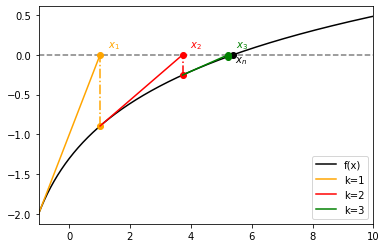

In [20]:
a, b = -1, 10
f = lambda x: math.log(x+2)-2
newton_raphson(f,a,b,wykres = True)

In [25]:
#Lekko zmodyfikowane funkcje tak by liczyły ilość porównań
#i zwracały miejsce zerowe + ilość wykonanych porównań.
def bisekcja(f, a, b, k):
    '''
    Funkcja obliczająca przybliżenie miejsca zerowego oraz
    ilość wykonanych porównań dla podanej funkcji z zadaną
    precyzji 2**(-k). W przypadku wprowadzenia błędnego
    przedziału lub funkcji, co poskutkujem niespełnieniem
    warunków metody pojawi się komunikat o błędzie.
    '''
    tolerancja = 2**(-k)
    c = (a+b)/2
    pół_długości = (b-a)/2
    n = 1
    if pół_długości <= tolerancja:
        return c
    f_a = f(a)
    while pół_długości > tolerancja:
        n += 1
        f_c = f(c)
        if f_a*f_c < 0:
            b = c
        elif f_a*f_c > 0:
            a = c
            f_a = f_c
        else:
            return c
        pół_długości /= 2
        c = (a+b)/2
    return c, n


def newton_raphson_2(f, a, b, k):
    '''
    Funkcja obliczająca przybliżenie miejsca zerowego podanej
    funkcji dla zadanej precyzji 2**(-k) oraz ilość wykonanych
    porównań. W przypadku wprowadzenia błędnego przedziału lub
    funkcji, co poskutkujem niespełnieniem warunków metody
    pojawi się komunikat o błędzie.
    '''
    precyzja = 2**(-k)
    if f(a)*f(b) > 0:
        return 'Błąd. Warunki nie są spełnione.'
    else:
        x0 = a
        x1 = x0 - f(x0)/pochodna_num(x0)
        n = 1
        while abs(x1-x0) > precyzja:
            x0 = x1
            x1 = x0-f(x0)/pochodna_num(x0)
            n += 1
    return x1, n


def autolabel(paski):
    '''
    Funkcja dopisująca wartość słupka bezpośrednio ponad nim,
    wyświetla jego wysokość.
    '''
    for p in paski:
        wys = p.get_height()
        ax.annotate(f'{wys}',
                    xy=(p.get_x() + p.get_width() / 2, wys),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

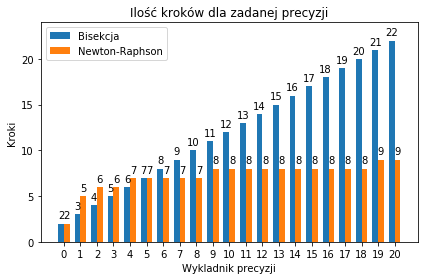

In [28]:
# Przygotowanie wykresu i jego narysowanie nieco inną metodą. 
# W końcu trzeba się rozwijać ;) 
a = -1
b = 2
f = lambda x: np.exp(x)-2
labels, bis, NR = [], [], []
for k in range(21):
    x0, nB = bisekcja(f, a, b, k)
    x1, nNR = newton_raphson_2(f,a,b,k)
    labels.append(k)
    bis.append(nB)
    NR.append(nNR)
x = np.arange(len(labels))
szerokosc = 0.35
fig, ax = plt.subplots()
B = ax.bar(x - szerokosc/2, bis, szerokosc, label='Bisekcja')
N_R = ax.bar(x + szerokosc/2, NR, szerokosc, label='Newton-Raphson')
ax.set_ylabel('Kroki')
ax.set_xlabel('Wykladnik precyzji')
ax.set_title('Ilość kroków dla zadanej precyzji')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,max(NR)+2 if max(NR)>max(bis) else max(bis)+2)
ax.legend(loc='upper left')
autolabel(B)
autolabel(N_R)
fig.tight_layout()
plt.show()

Z działania powyższego kodu wynika, że zarówno metodą bisekcji jak i Newtona-Raphsona można znaleźć przybliżenie miejsca zerowego. Okazuje się, że dla niskiej dokładności $2^{-k}$, gdzie $k \in [1,2,3]$ metoda bisekcji szybciej znajduje to przybliżenie. Natomiast im dokładność jest większa tym metoda bisekcji staje się coraz wolniejsza w porównaniu do metody Newtona-Raphsona. Dla $k<6$ zdarzają się sytuacje, dla których obie metody wykonują porównywalną ilość kroków, jednakże dla $k\geqslant 6$ różnica zaczyna być coraz bardziej zauważalna.